# Hands-On Research #3
## Image Feature Representations, Filters and Convolutions

In this session we will focus on featurizing images with more sophisticated techniques than colour histograms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.load_images import load_images, rgb_to_greyscale, compare_images
%matplotlib inline
plt.gray()

<Figure size 432x288 with 0 Axes>

### Load Images

We will be working with the following 4 greyscale images, visualized below.

(4, 768, 1024)


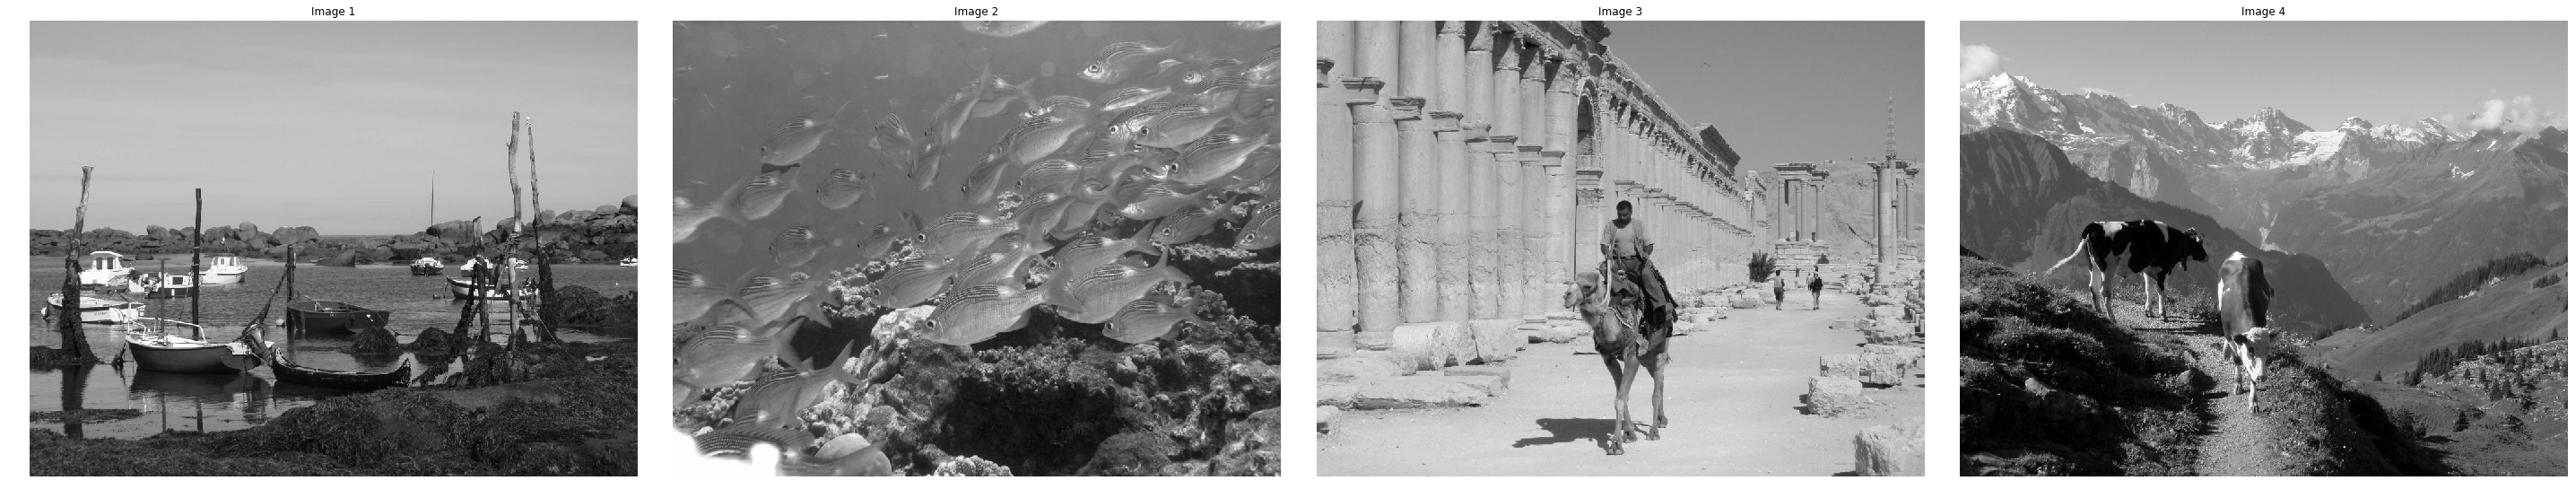

In [2]:
fig = plt.figure(figsize=(40,80))
images = rgb_to_greyscale(load_images())
print(np.shape(images)) # 4 images of dimension: (768, 1024) = (Height, Width)
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.title("Image {}".format(i+1))
    plt.axis('off')
plt.gcf().tight_layout()

### Padding Images

Next we will pad the images with zeros so that when we do the filtering, the output will be the same size of the image. The pad around each image will be two rows and two columns of zeros on either side.
Notice a small dark border around the images below (that does not appear above), representing the zero padding.

Shape of images should be (num_images, padded_width, padded_height)=(4,772,1028)
(4, 772, 1028)


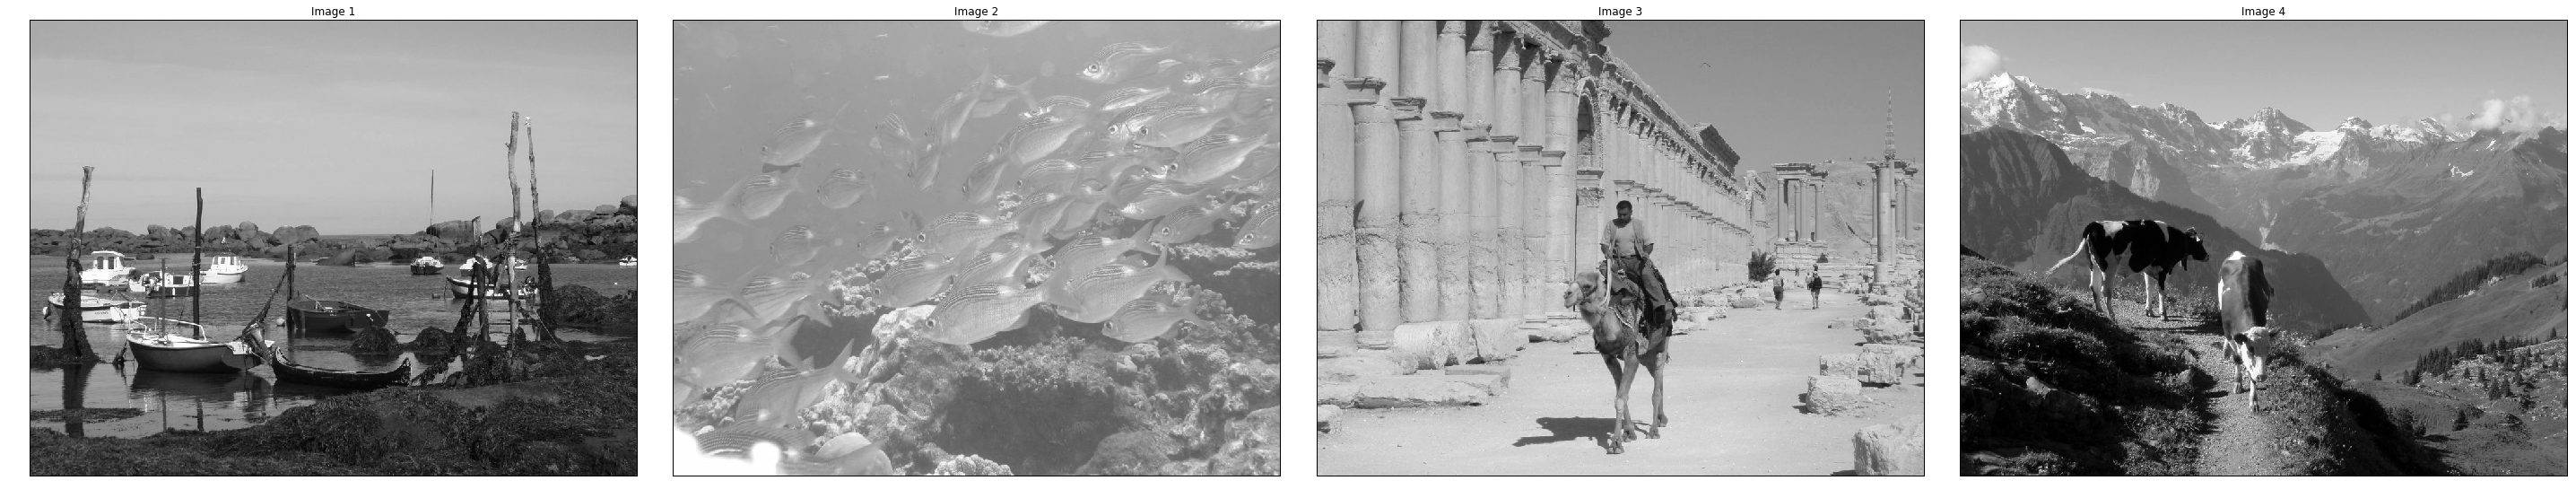

In [3]:
# Pad Images:
padded_images = [ np.pad(img, ((2,2),(2,2)), 'constant') for img in images]
print("Shape of images should be (num_images, padded_width, padded_height)=(4,772,1028)")
print(np.shape(padded_images))
fig = plt.figure(figsize=(40,80))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(padded_images[i])
    plt.title("Image {}".format(i+1))
    plt.axis('off')
plt.gcf().tight_layout()

### Creating Filters

Here we can create a few 5x5 filters to test on the images. We've provided a couple, and feel free to experiment with them!

In [4]:
filter1 = np.asarray([[1.,1.,1.,1.,1.], 
                      [1.,1.,1.,1.,1.],  
                      [1.,1.,1.,1.,1.],
                      [1.,1.,1.,1.,1.],
                      [1.,1.,1.,1.,1.]])
filter1 = filter1 * (1./25.)

filter2 = np.asarray([[0.,0.,0.,0.,0.], 
                      [0.,0.,0.,0.,0.],  
                      [0.,0.,1.,0.,0.],
                      [0.,0.,0.,0.,0.],
                      [0.,0.,0.,0.,0.]])

# Customize your own:
filter3 = 

SyntaxError: invalid syntax (<ipython-input-4-1bfb0596f4b3>, line 15)

### Apply the convlution to the image

Fill in the missing code to apply the filter as a convolution.

In [ ]:
def apply_filter(img, fltr):
    """
    Arguments:
        1) img - this is the padded image with shape (772, 1028)
        2) fltr - this is a filter of your choosing with shape (5, 5)
    Returns:
        'output': An image with the filter applied to it. Should have shape of original image: (768, 1024)
    Hints:
        - Use 2 nested for loops to iterate over the height and width of the output image. At each internal
        iteration populate the varible 'output' with the sum of the product of the filter and 
        img at that part of the image.
        - Useful functions include range() and np.sum().
        - Remember to get a segment of a matrix you can input a range like this m[1:5].
        This returns elements in for indices 1, 2, 3, and 4.
        - To get the part of the image that should go in the (i, j)-th entry of the output, you can call
        img[i:i + fH, j:j + fW].
    """
    H,W = np.shape(img) # (772, 1028)
    fH, fW = np.shape(fltr) # (5, 5)
    output = np.zeros((768, 1024))

    # START CODE
    # END CODE
    
    return output

### Filter1

Apply filter1 to all 4 images.

In [ ]:
filter1_images = [apply_filter(img, filter1) for img in padded_images]

Now pass in either 1,2,3, or 4 as the second argument to 'compare_images' to run the corresponding image, comparing 
the original to the one processed by the filter.

In [ ]:
img_index = 1 # use one of image index numbers 1, 2, 3 or 4.
compare_images(images + filter1_images, img_index, ["Original Image", "Filter Applied", "Difference Image"]) 

### Filter2

Apply filter2 to all 4 images.

In [ ]:
filter2_images = [apply_filter(img, filter2) for img in padded_images]

In [ ]:
img_index = 2 # use one of image index numbers 1, 2, 3 or 4.
compare_images(images + filter2_images, img_index, ["Original Image", "Filter Applied", "Difference Image"]) 

### Filter3

Apply filter3 to all 4 images.

In [ ]:
filter3_images = [apply_filter(img, filter3) for img in padded_images]

In [ ]:
img_index = 1 # use one of image index numbers 1, 2, 3 or 4.
compare_images(images + filter3_images, img_index, ["Original Image", "Filter Applied", "Difference Image"])

## Pooling

Now implement max pooling and average pooling.

In [ ]:
def max_pooling(img, pool_dim):
    """
    Arguments:
        1) img - this is the regular (unpadded) image with shape (768, 1024)
        2) pool_dim - dimension of the pooling. Default = 4
    Returns:
        'output': An image with the pooling applied to it. 
        Should have shape of original image: (768/pool_dim, 1024/pool_dim)
    Hints:
        - Use 2 nested for loops to iterate over poolH and poolW. At each internal
        iteration populate the varible 'output' with the maximum value over the appropriate image region.
        - Useful functions include range() and np.max().
        - Remember to get a segment of a matrix you can input a range like this m[1:5].
        - To get the (i, j)-th pooling region, you can call 
        img[i*pool_dim:(i + 1)*pool_dim, j*pool_dim:(j + 1)*pool_dim]
        This returns elements in for indices 1, 2, 3, and 4.
    """
    H,W = np.shape(img)       # (H = 768, W = 1024)
    poolH, poolW = H//pool_dim, W//pool_dim   # (768/4 = 192, 1024/4 = 256)
    output = np.zeros((poolH, poolW))
    
    # START CODE
    # END CODE
    
    return output

In [ ]:
def avg_pooling(img, pool_dim):
    """
    Arguments:
        1) img - this is the regular (unpadded) image with shape (768, 1024)
        2) pool_dim - dimension of the pooling. Default = 4
    Returns:
        'output': An image with the pooling applied to it. 
        Should have shape of original image: (768/pool_dim, 1024/pool_dim)
    Hints:
        - This should be exactly the same as max_pooling, but use np.average() instead of np.max().
    """
    H,W = np.shape(img)       # (H = 768, W = 1024)
    poolH, poolW = H//4, W//4   # (768/4 = 192, 1024/4 = 256)
    output = np.zeros((poolH, poolW))
    
    # START CODE
    # END CODE
    
    return output

In [ ]:
max_pool_images = [max_pooling(img, 4) for img in images]
avg_pool_images = [avg_pooling(img, 4) for img in images]

Now see the effect of max pooling:

In [ ]:
img_index = 1
compare_images(images + max_pool_images, img_index, ["Original Image", "Max Pooling Applied", "Difference Image"])

Now see the effect of average pooling:

In [ ]:
img_index = 2
compare_images(images + avg_pool_images, img_index, ["Original Image", "Avg Pooling Applied", "Difference Image"])

Now compare max and average pooling:

In [ ]:
img_index = 2
compare_images(max_pool_images + avg_pool_images, img_index, ["Max Pooling Image", "Avg Pooling Applied", "Difference Image"])